In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Import dataset
df = pd.read_csv('project_dataset.csv')
df.head()

,EmployeeID,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
0,1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
1,2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
2,4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
3,5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
4,7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No


In [3]:
df.shape

(1470, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   MonthlyIncome            1470 non-null   int64 
 4   JobSatisfaction          1470 non-null   int64 
 5   Bonus                    1470 non-null   int64 
 6   Department               1470 non-null   object
 7   DistanceFromHome         1470 non-null   int64 
 8   Education                1470 non-null   int64 
 9   EducationField           1470 non-null   object
 10  EnvSatisfaction          1470 non-null   int64 
 11  Gender                   1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  PerformanceRating        1470 non-null  

In [5]:
#Check for any duplicated data
df[df.duplicated(keep=False)]

,EmployeeID,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition


In [6]:
#Check for total missing data
df.isnull().sum()

EmployeeID                 0
Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [7]:
df.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'MonthlyIncome',
       'JobSatisfaction', 'Bonus', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvSatisfaction', 'Gender', 'JobRole',
       'MaritalStatus', 'PerformanceRating', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [8]:
#Convert numerical to categorical and place into a new column
df.loc[df['JobSatisfaction'] == 1, 'Job Satisfaction'] = 'Low'
df.loc[df['JobSatisfaction'] == 2, 'Job Satisfaction'] = 'Medium'
df.loc[df['JobSatisfaction'] == 3, 'Job Satisfaction'] = 'High'
df.loc[df['JobSatisfaction'] == 4, 'Job Satisfaction'] = 'Very High'

df.loc[df['EnvSatisfaction'] == 1, 'Environment Satisfaction'] = 'Low'
df.loc[df['EnvSatisfaction'] == 2, 'Environment Satisfaction'] = 'Medium'
df.loc[df['EnvSatisfaction'] == 3, 'Environment Satisfaction'] = 'High'
df.loc[df['EnvSatisfaction'] == 4, 'Environment Satisfaction'] = 'Very High'

df.loc[df['Education'] == 1, 'Education'] = 'Below College'
df.loc[df['Education'] == 2, 'Education'] = 'College'
df.loc[df['Education'] == 3, 'Education'] = 'Degree'
df.loc[df['Education'] == 4, 'Education'] = 'Masters'
df.loc[df['Education'] == 5, 'Education'] = 'PhD'

df.loc[df['Attrition'] == 'Yes', 'Attrition Status'] = 'Left'
df.loc[df['Attrition'] == 'No', 'Attrition Status'] = 'Stay'

df = df[['Age', 'BusinessTravel', 'MonthlyIncome','Job Satisfaction',
         'Bonus', 'Department', 'DistanceFromHome','Education',
         'EducationField', 'Environment Satisfaction', 'Gender', 'JobRole',
         'MaritalStatus', 'PerformanceRating', 'TrainingTimesLastYear',
         'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime', 'Attrition Status']]
df.head()


,Age,BusinessTravel,MonthlyIncome,Job Satisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,Environment Satisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition Status
0,41,Travel_Rarely,5993,Very High,17979,Sales,1,College,Life Sciences,Medium,Female,Sales Executive,Single,3,0,6,0,Yes,Left
1,49,Travel_Frequently,5130,Medium,20520,Research & Development,8,Below College,Life Sciences,High,Male,Research Scientist,Married,4,3,10,1,No,Stay
2,37,Travel_Rarely,2090,High,6270,Research & Development,2,College,Other,Very High,Male,Laboratory Technician,Single,3,3,0,0,Yes,Left
3,33,Travel_Frequently,2909,High,8727,Research & Development,3,Masters,Life Sciences,Very High,Female,Research Scientist,Married,3,3,8,3,Yes,Stay
4,27,Travel_Rarely,3468,Medium,10404,Research & Development,2,Below College,Medical,Low,Male,Laboratory Technician,Married,3,3,2,2,No,Stay


## Proportion of Gender?

In [9]:
gender_count = df['Gender'].value_counts
gender_count()

Gender
Male      882
Female    588
Name: count, dtype: int64

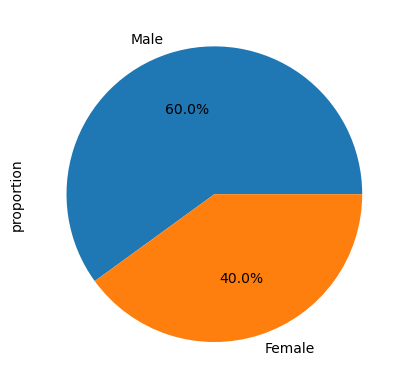

In [10]:
gender_proportion = df['Gender'].value_counts(normalize=True)*100
gender_proportion.plot(kind='pie',autopct='%.1f%%')
plt.show()

In [11]:
Gender_attritionprop = pd.crosstab(index=df['Gender'],columns=df['Attrition Status'], normalize='index')*100
Gender_attritionprop

Attrition Status,Left,Stay
Gender,,
Female,14.795918,85.204082
Male,17.006803,82.993197


In [12]:
Gender_attrition = pd.crosstab(index=df['Gender'],columns=df['Attrition Status'])
Gender_attrition

Attrition Status,Left,Stay
Gender,,
Female,87,501
Male,150,732


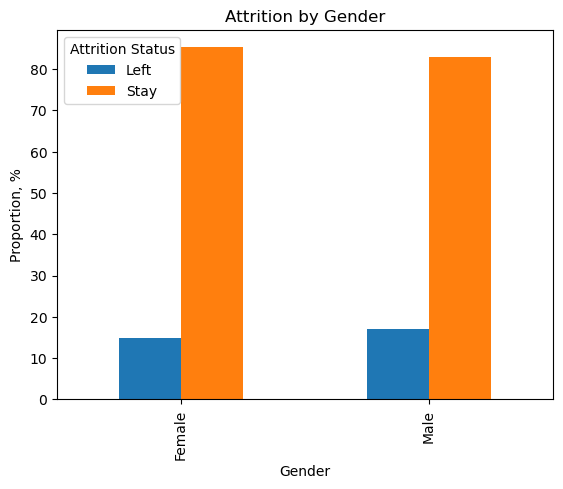

In [13]:
Gender_attritionprop.plot(kind='bar')
plt.title('Attrition by Gender')
plt.ylabel('Proportion, %')

plt.show()

In [14]:
c, p, dof, expected = stats.chi2_contingency(Gender_attrition)
p

0.29057244902890855

## Distribution of Age

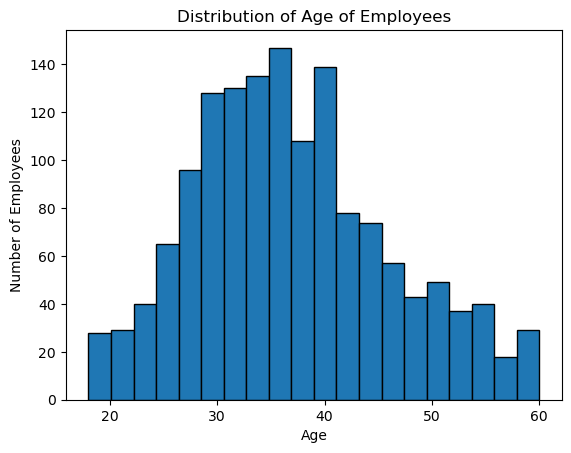

In [15]:
plt.hist(df['Age'],bins=20,edgecolor='black' )
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Distribution of Age of Employees')
plt.show()

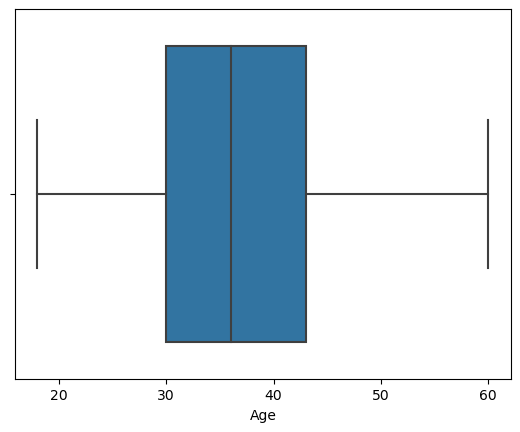

In [16]:
sns.boxplot(x='Age',data=df)
plt.show()

In [17]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [18]:
df_attrition = df[df['Attrition Status'] == 'Left']
df_attrition.head()

,Age,BusinessTravel,MonthlyIncome,Job Satisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,Environment Satisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition Status
0,41,Travel_Rarely,5993,Very High,17979,Sales,1,College,Life Sciences,Medium,Female,Sales Executive,Single,3,0,6,0,Yes,Left
2,37,Travel_Rarely,2090,High,6270,Research & Development,2,College,Other,Very High,Male,Laboratory Technician,Single,3,3,0,0,Yes,Left
14,28,Travel_Rarely,2028,High,6084,Research & Development,24,Degree,Life Sciences,High,Male,Laboratory Technician,Single,3,4,4,0,Yes,Left
21,36,Travel_Rarely,3407,Low,13628,Sales,9,Masters,Life Sciences,High,Male,Sales Representative,Single,4,4,5,0,No,Left
24,34,Travel_Rarely,2960,Low,8880,Research & Development,6,Below College,Medical,Medium,Male,Research Scientist,Single,3,2,4,1,No,Left


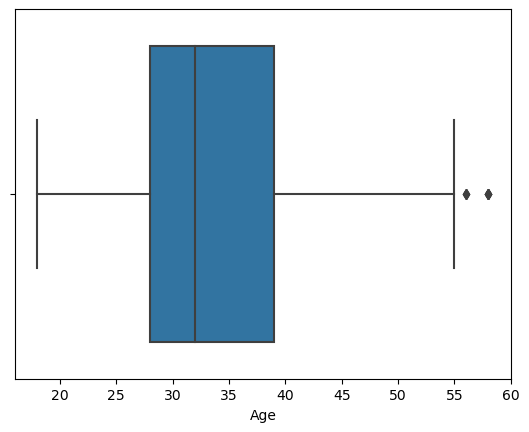

In [19]:
#plot boxplot for attrition status = left
sns.boxplot(x='Age',data=df_attrition)
plt.show()

In [20]:
df_attrition['Age'].describe()


count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: Age, dtype: float64

## Proportion of Attrition (Respond variable)

In [21]:
attrition_count = df['Attrition Status'].value_counts
attrition_count()

Attrition Status
Stay    1233
Left     237
Name: count, dtype: int64

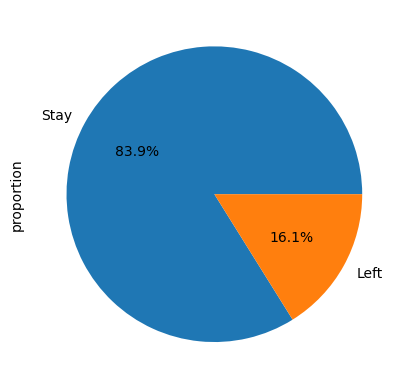

In [22]:
#Proportion of Attrition
attrition_prop = df['Attrition Status'].value_counts(normalize=True)*100
attrition_prop.plot(kind='pie',autopct='%.1f%%')
plt.show()

Proportion of Stay and Left in the Attrition status of an employee is imbalance. This will cause bias when training the model. Model is predicted to perform better on predicting Stay class in Attrition.

## Job Satisfaction vs Attrition

In [23]:
JobSatisfaction_attrition = pd.crosstab(index=df['Job Satisfaction'],columns=df['Attrition Status'])
JobSatisfaction_attrition

Attrition Status,Left,Stay
Job Satisfaction,,
High,73,369
Low,66,223
Medium,46,234
Very High,52,407


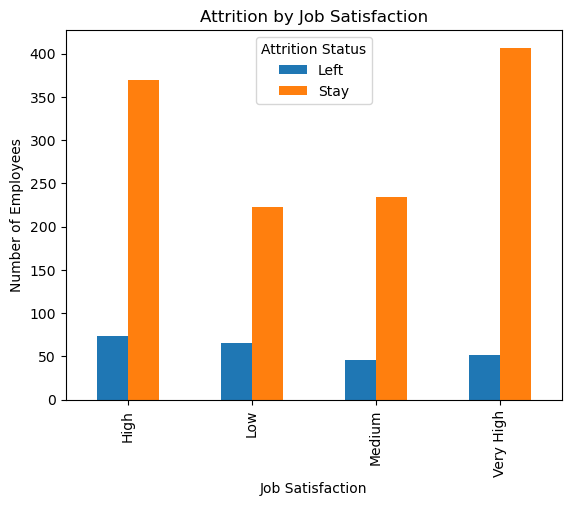

In [24]:
JobSatisfaction_attrition.plot(kind='bar')
plt.title('Attrition by Job Satisfaction')
plt.ylabel('Number of Employees')

plt.show()

In [25]:
c, p, dof, expected = stats.chi2_contingency(JobSatisfaction_attrition)
p

0.0005563004510387556

###### From the graph plotted, we can say that the retention rate is high for employee with high Job Satisfaction.

## Does the age of employees influence in attrition status?

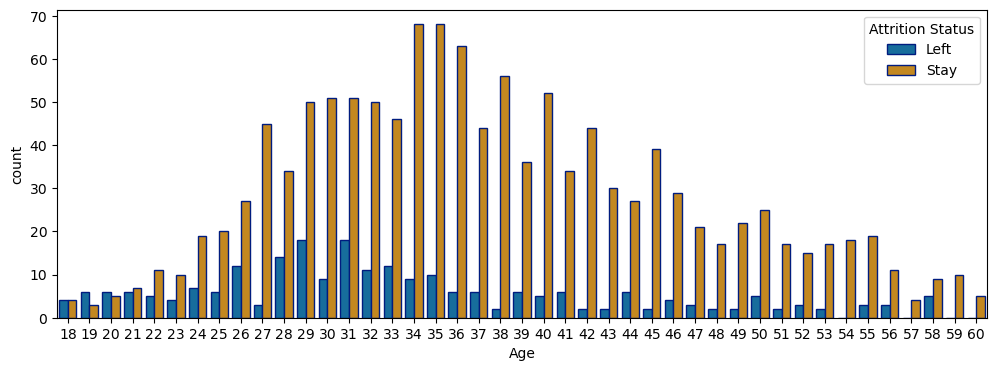

In [26]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Age', 
              hue='Attrition Status', 
              data = df, 
              palette= "colorblind", 
              ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1));

In [27]:
meanAttrition_age = df.groupby('Attrition Status',as_index = False)['Age'].mean()
meanAttrition_age = meanAttrition_age.round(2)
meanAttrition_age

,Attrition Status,Age
0,Left,33.61
1,Stay,37.56


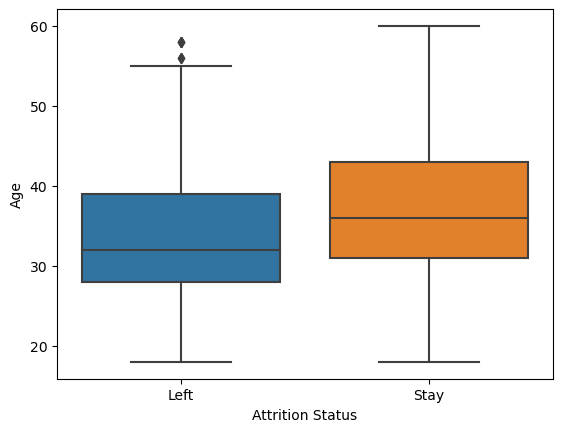

In [28]:
sns.boxplot(x='Attrition Status',
            y='Age',
           data=df)
plt.show()

The age of employees who left the company seems to be slightly younger than those employees who stay at company.

In [29]:
df['Attrition Status'].value_counts()

Attrition Status
Stay    1233
Left     237
Name: count, dtype: int64

In [30]:
#To check if mean Age of employee that leave is significantly different than employee who stay.
#H null - There is no significant difference of mean age of employess between those stay or leave the company.
#H alternative - There is a significant difference of mean age of employess between those stay or leave the company.

In [31]:
stats.levene(df['Age'][df['Attrition Status']=='Left'],
             df['Age'][df['Attrition Status']=='Stay'],
             center='mean')

LeveneResult(statistic=1.1583170677572885, pvalue=0.2819916793250208)

In [32]:
stats.ttest_ind(df['Age'][df['Attrition Status']=='Left'],
                df['Age'][df['Attrition Status']=='Stay'],
                equal_var=True)

TtestResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10, df=1468.0)

##### Age have a significant effect on the attrition of employees. Employees who are younger tend to leave the company compare to those who are older

## Education Field vs Monthly Income

In [33]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'Job Satisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'Environment Satisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition Status'],
      dtype='object')

In [34]:
meanEdu_income = df.groupby('EducationField',as_index = True)['MonthlyIncome'].mean()
meanEdu_income = meanEdu_income.round(2)
meanEdu_income

EducationField
Human Resources     7241.15
Life Sciences       6463.29
Marketing           7348.58
Medical             6510.04
Other               6071.55
Technical Degree    5758.30
Name: MonthlyIncome, dtype: float64

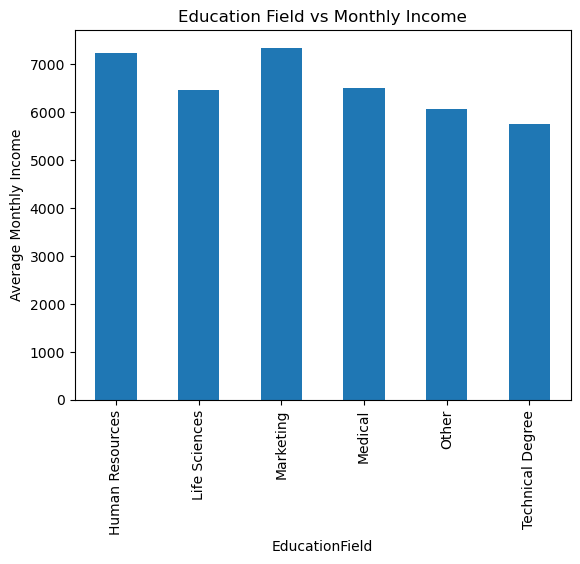

In [35]:
meanEdu_income.plot(kind='bar')
plt.title('Education Field vs Monthly Income')
plt.ylabel('Average Monthly Income')

plt.show()

## What is the relationship between monthly income and attrition status?

In [36]:
meanAttrition_income = df.groupby('Attrition Status',as_index = False)['MonthlyIncome'].mean()
meanAttrition_income = meanAttrition_income.round(2)
meanAttrition_income

,Attrition Status,MonthlyIncome
0,Left,4787.09
1,Stay,6832.74


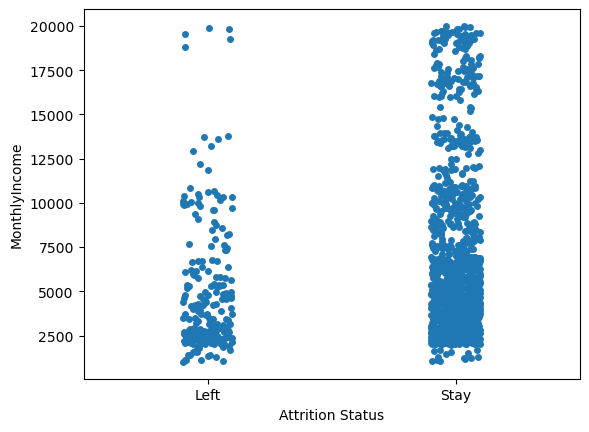

In [37]:
sns.stripplot(x='Attrition Status', y='MonthlyIncome', data=df, jitter=True)
plt.show()


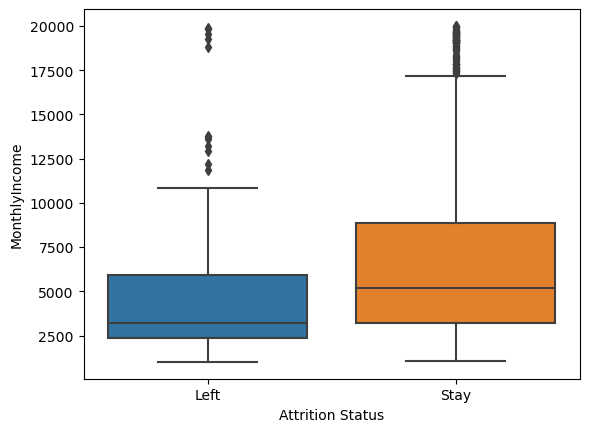

In [38]:
sns.boxplot(x='Attrition Status',
            y='MonthlyIncome',
           data=df)
plt.show()

In [39]:
#The employees with a lower monthly income is more likely to leave compared to the employees with higher monthly income

#H-null - The monthly income of an employee has no significant effect on the attrition status.
#H-alternative - The monthly income of an employee has a significant effect on the attrition status.

In [40]:
stats.levene(df['MonthlyIncome'][df['Attrition Status']=='Left'],
             df['MonthlyIncome'][df['Attrition Status']=='Stay'],
             center='mean')

LeveneResult(statistic=26.31302358992364, pvalue=3.29070575711061e-07)

In [41]:
stats.ttest_ind(df['MonthlyIncome'][df['Attrition Status']=='Left'],
                df['MonthlyIncome'][df['Attrition Status']=='Stay'],
                equal_var=False)

TtestResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13, df=412.74074755747006)

#### p-value < 0.05. Accept alternative hypothesis. The monthly income of an employee does have a significant impact on the attrition status

### Job Role vs Salary

In [42]:
meanRole_salary = df.groupby('JobRole',as_index = False)['MonthlyIncome'].mean()
meanRole_salary = meanRole_salary.round(2)
meanRole_salary


,JobRole,MonthlyIncome
0,Healthcare Representative,7528.76
1,Human Resources,4235.75
2,Laboratory Technician,3237.17
3,Manager,17181.68
4,Manufacturing Director,7295.14
5,Research Director,16033.55
6,Research Scientist,3239.97
7,Sales Executive,6924.28
8,Sales Representative,2626.00


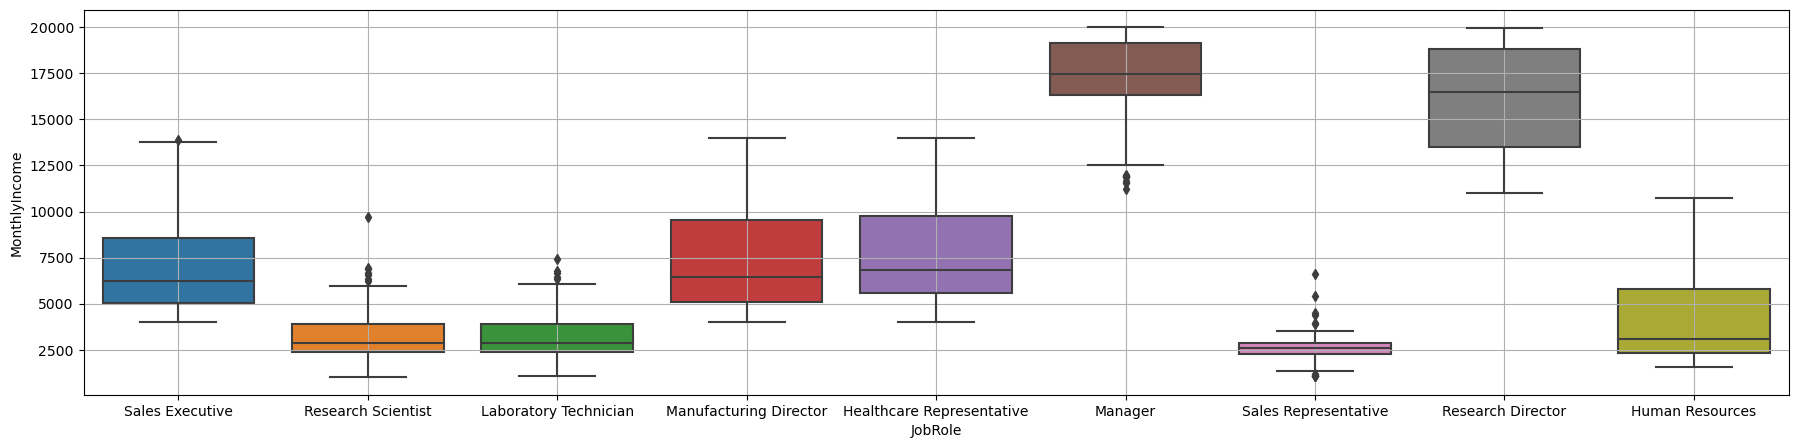

In [43]:
#fig, ax = plt.subplots(figsize=(, 5))
plt.figure(figsize=(22,5))
sns.boxplot(x='JobRole',
            y='MonthlyIncome',
           data=df)

plt.grid(True, alpha=1)
plt.show()

Managers and Research Director earn a relatively large sum. Intuitively, the attrition must have an inverse relationship with the monthly income parameter.

Research Scientists, Lab. Technicians and Sales Rep positions are not well paid. Such factors would lead to attrition in these departments.

### Does the job role of an employee have a significant change on status of attrition?

In [44]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

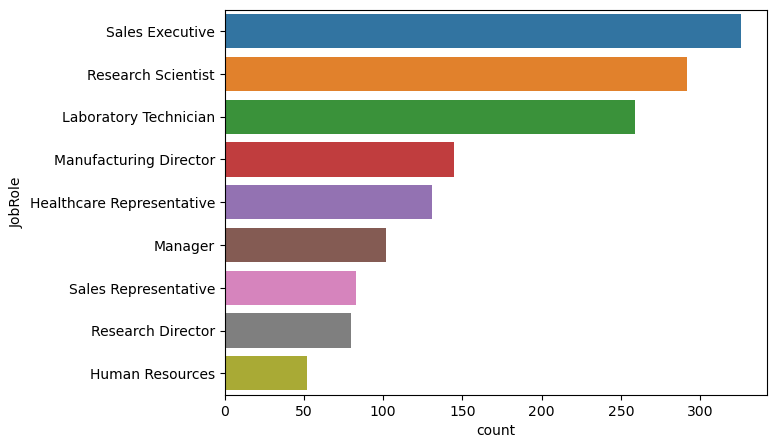

In [45]:
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(y='JobRole',data=df)
plt.show()

In [46]:
Role_attritionprop = pd.crosstab(index=df['JobRole'],columns=df['Attrition Status'],normalize='index')*100
Role_attritionprop.round(2)

Attrition Status,Left,Stay
JobRole,,
Healthcare Representative,6.87,93.13
Human Resources,23.08,76.92
Laboratory Technician,23.94,76.06
Manager,4.90,95.10
Manufacturing Director,6.90,93.10
Research Director,2.50,97.50
Research Scientist,16.10,83.90
Sales Executive,17.48,82.52
Sales Representative,39.76,60.24


In [47]:
Role_attrition = pd.crosstab(index=df['JobRole'],columns=df['Attrition Status'])
Role_attrition

Attrition Status,Left,Stay
JobRole,,
Healthcare Representative,9,122
Human Resources,12,40
Laboratory Technician,62,197
Manager,5,97
Manufacturing Director,10,135
Research Director,2,78
Research Scientist,47,245
Sales Executive,57,269
Sales Representative,33,50


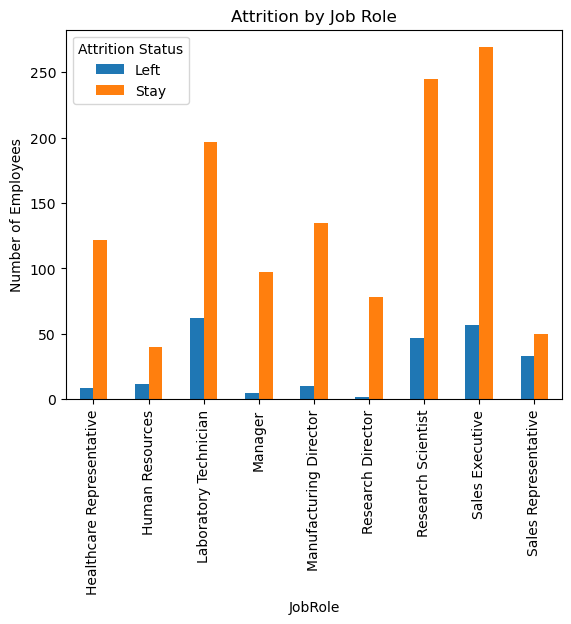

In [48]:
Role_attrition.plot(kind='bar')
plt.title('Attrition by Job Role')
plt.ylabel('Number of Employees')

plt.show()

In [49]:
c, p, dof, expected = stats.chi2_contingency(Role_attrition)
p

2.752481638050657e-15

As expected, Research Scientist, Lab. Technicians and Sales Representatives have high attrition in their department, whereas Managers and Directors have little attrition. Low monthly income is one piece of evidence that supports a high attrition rate

### Job Role vs Overtime

In [50]:
Role_OT = pd.crosstab(index=df['JobRole'],columns=df['OverTime'])
Role_OT = Role_OT.round(2)
Role_OT

OverTime,No,Yes
JobRole,,
Healthcare Representative,94,37
Human Resources,39,13
Laboratory Technician,197,62
Manager,75,27
Manufacturing Director,106,39
Research Director,57,23
Research Scientist,195,97
Sales Executive,232,94
Sales Representative,59,24


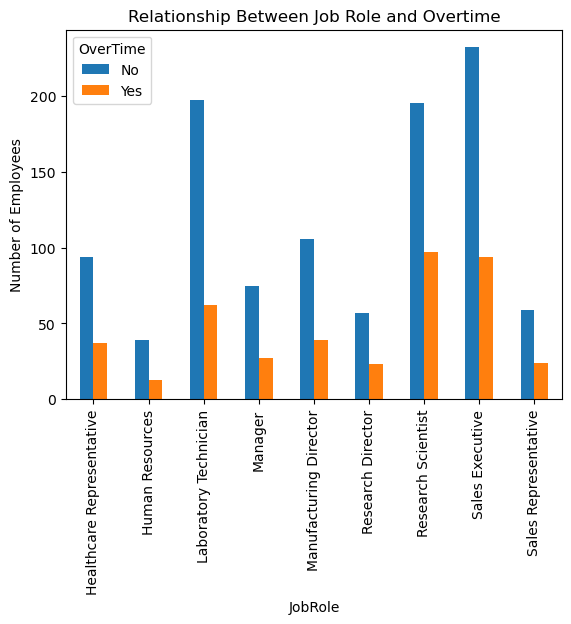

In [51]:
Role_OT.plot(kind='bar')
plt.ylabel('Number of Employees')
plt.title('Relationship Between Job Role and Overtime')
plt.show()

From the above plot, we can say that Research Scientist and Lab. Technicians deserves a pay raise in compensation, eventually resulting in fewer drop-outs from these departments. Such insights would immensely help in employee retention planning.

### Is there any relationship between Overtime and Attrition Status?

In [52]:
OverTime_attritionprop = pd.crosstab(index=df['Attrition Status'],columns=df['OverTime'],normalize='index')*100
OverTime_attritionprop = OverTime_attritionprop.round(2)

#edu_Attrition = edu_Attrition.sort_values(by=['Yes'], ascending=False)
OverTime_attritionprop


OverTime,No,Yes
Attrition Status,,
Left,46.41,53.59
Stay,76.56,23.44


The proportion of employees who left the company is slightly higher for those who work overtime compared to those who did not work overtime.

In [53]:
OverTime_attrition = pd.crosstab(index=df['Attrition Status'],columns=df['OverTime'])
OverTime_attrition = OverTime_attrition.round(2)
OverTime_attrition


OverTime,No,Yes
Attrition Status,,
Left,110,127
Stay,944,289


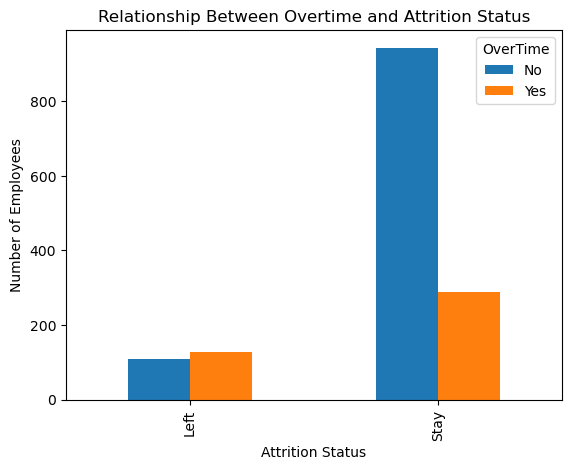

In [54]:
OverTime_attrition.plot(kind='bar')
plt.ylabel('Number of Employees')
plt.title('Relationship Between Overtime and Attrition Status')
plt.show()

In [55]:
c, p, dof, expected = stats.chi2_contingency(OverTime_attrition)
p

8.15842372153832e-21

H-null - There is no relationship between overtime and attrition status

H-alternative - There is a relationship between overtime and attrition status

p-value < 0.05, alternative hypothesis is accepted.

The employee who does overtime is more likely to leave the company.

### Is there any relationship between attrition status and number of years of employee at company?

In [56]:
meanAttrition_years = df.groupby('Attrition Status',as_index = False)['YearsAtCompany'].mean()
meanAttrition_years = meanAttrition_years.round(2)
meanAttrition_years


,Attrition Status,YearsAtCompany
0,Left,5.13
1,Stay,7.37


The employee who leaves the company have a lower average of years in company compared to those who stay.

The lower the number of years of an employee at the company, the more likely for employee to leave.

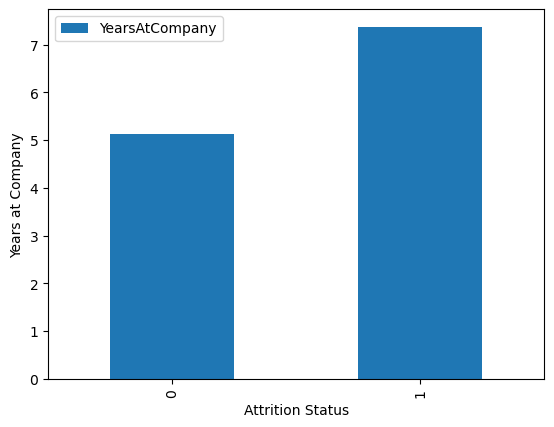

In [57]:
meanAttrition_years.plot(kind='bar')
plt.xlabel('Attrition Status')
plt.ylabel('Years at Company')
plt.show()

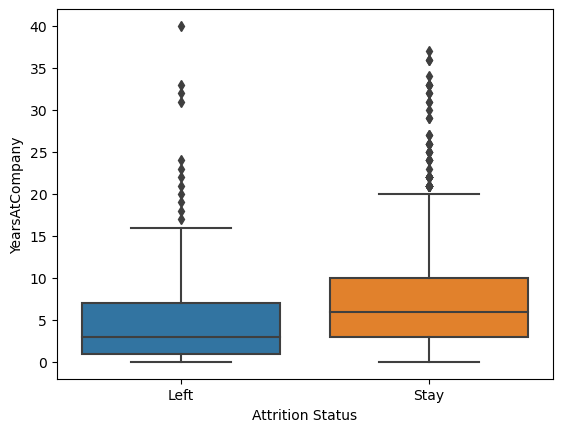

In [58]:
sns.boxplot(x='Attrition Status',
            y='YearsAtCompany',
           data=df)
plt.show()

H-null - The number of years spent by an employee in the company do not have any relationship with attrition status

H-alternative - The number of years spent by an employee in the company do have a relationship with attrition status

In [59]:
stats.levene(df['YearsAtCompany'][df['Attrition Status']=='Left'],
             df['YearsAtCompany'][df['Attrition Status']=='Stay'],
             center='mean')

LeveneResult(statistic=2.5049476586425445, pvalue=0.11370465713766563)

In [60]:
stats.ttest_ind(df['YearsAtCompany'][df['Attrition Status']=='Left'],
                df['YearsAtCompany'][df['Attrition Status']=='Stay'],
                equal_var=True)

TtestResult(statistic=-5.1963086670254235, pvalue=2.3188716103863028e-07, df=1468.0)

p-value < 0.05, alternative hypothesis is accepted.

The number of years spent by an employee in the company does have an effect to the attrition status

The employee who has been in the company for a shorter period of time is more likely to leave the company.

### Does the marital status of an employee influence them to leave the company?

In [61]:
Marital_status = df['MaritalStatus'].value_counts()
Marital_status

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

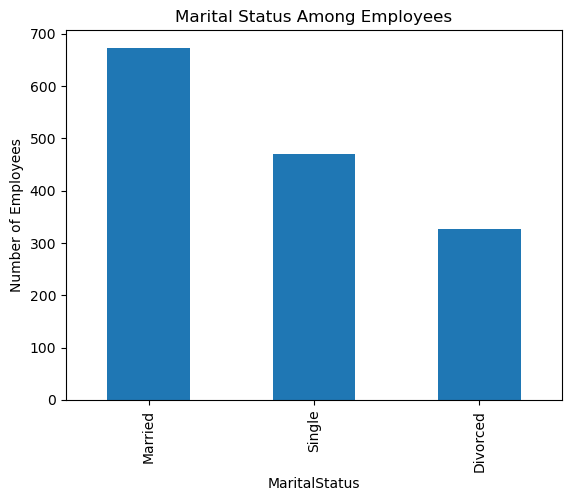

In [62]:
Marital_status.plot(kind='bar')
plt.ylabel('Number of Employees')
plt.title('Marital Status Among Employees')
plt.show()

In [63]:
Married_attritionprop = pd.crosstab(index=df['MaritalStatus'],columns=df['Attrition Status'],normalize='index')*100
Married_attritionprop.round(2)

Attrition Status,Left,Stay
MaritalStatus,,
Divorced,10.09,89.91
Married,12.48,87.52
Single,25.53,74.47


In [64]:
Married_attrition = pd.crosstab(index=df['MaritalStatus'],columns=df['Attrition Status'])
Married_attrition

Attrition Status,Left,Stay
MaritalStatus,,
Divorced,33,294
Married,84,589
Single,120,350


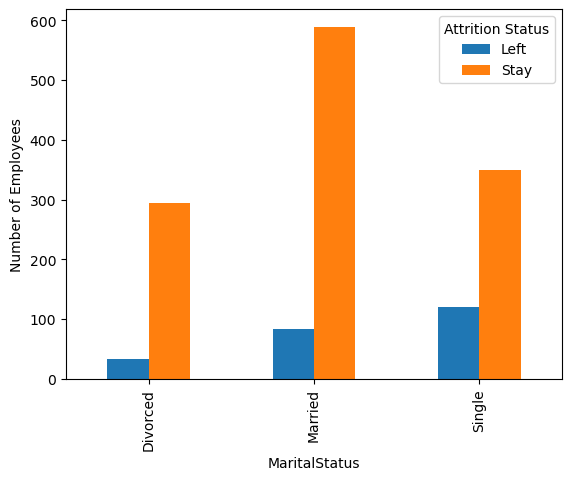

In [65]:
Married_attrition.plot(kind='bar')
plt.ylabel('Number of Employees')

plt.show()

In [66]:
c, p, dof, expected = stats.chi2_contingency(Married_attrition)
p

9.45551106034083e-11

Employees who are single is more likely to leave the company.

### Is the attrition status of an employee influenced by the years since last promotion?

In [67]:
meanAttrition_promo = df.groupby('Attrition Status',as_index = False)['YearsSinceLastPromotion'].mean()
meanAttrition_promo = meanAttrition_promo.round(2)
meanAttrition_promo

,Attrition Status,YearsSinceLastPromotion
0,Left,1.95
1,Stay,2.23


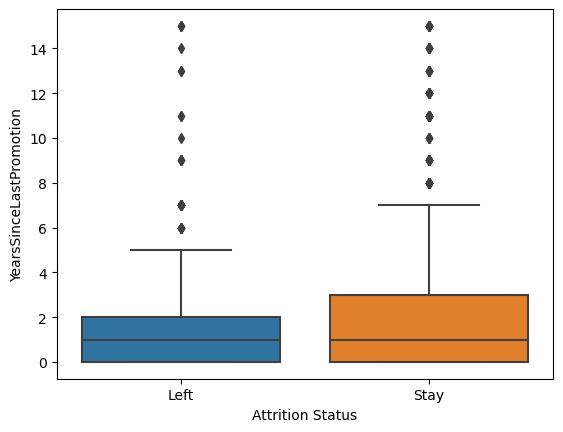

In [68]:
sns.boxplot(x='Attrition Status',
            y='YearsSinceLastPromotion',
           data=df)
plt.show()

H-null - There is no relationship between the years since last promotion and attrition status

H-alternative - There is a relationship between the years since last promotion and attrition status



In [69]:
stats.levene(df['YearsSinceLastPromotion'][df['Attrition Status']=='Left'],
             df['YearsSinceLastPromotion'][df['Attrition Status']=='Stay'],
             center='mean')

LeveneResult(statistic=1.2865078146687527, pvalue=0.25687769398884447)

In [70]:
stats.ttest_ind(df['YearsSinceLastPromotion'][df['Attrition Status']=='Left'],
                df['YearsSinceLastPromotion'][df['Attrition Status']=='Stay'],
                equal_var=True)

TtestResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936, df=1468.0)

p-value > 0.05. Null Hypothesis is accepted.

There is no relationship between number of years since last promotion and attrition status

The number of years since last promotion does not affect the attrition status of an employee

### Is the attrition status of an employee influenced by education?

In [73]:
Education_level = df['Education'].value_counts()
Education_level

Education
Degree           572
Masters          398
College          282
Below College    170
PhD               48
Name: count, dtype: int64

In [74]:
Education_levelprop = df['Education'].value_counts(normalize=True)*100
Education_levelprop

Education
Degree           38.911565
Masters          27.074830
College          19.183673
Below College    11.564626
PhD               3.265306
Name: proportion, dtype: float64

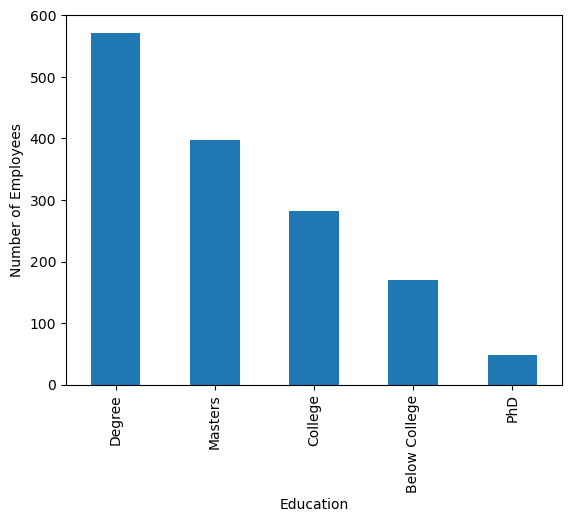

In [75]:
Education_level.plot(kind='bar')
plt.ylabel('Number of Employees')

plt.show()


In [76]:
Education_attrition = pd.crosstab(index=df['Education'],columns=df['Attrition Status'])
Education_attrition

Attrition Status,Left,Stay
Education,,
Below College,31,139
College,44,238
Degree,99,473
Masters,58,340
PhD,5,43


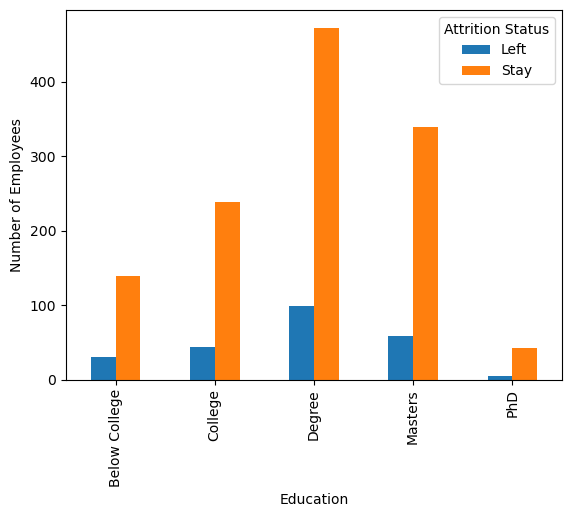

In [77]:
Education_attrition.plot(kind='bar')
plt.ylabel('Number of Employees')

plt.show()

In [79]:
c, p, dof, expected = stats.chi2_contingency(Education_attrition)
p

0.5455253376565949

H-null - There is no relationship between education level and attrition status

H-alternative - There is a relationship between education level and attrition status

p-value > 0.05. Null Hypothesis is accepted.

There is no relationship between education and attrition status

The level of education does not affect the attrition status of an employee

### Business Travel and Attrition Status

In [80]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'Job Satisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'Environment Satisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition Status'],
      dtype='object')

In [81]:
Travel_attrition = pd.crosstab(index=df['BusinessTravel'],columns=df['Attrition Status'])
Travel_attrition

Attrition Status,Left,Stay
BusinessTravel,,
Non-Travel,12,138
Travel_Frequently,69,208
Travel_Rarely,156,887


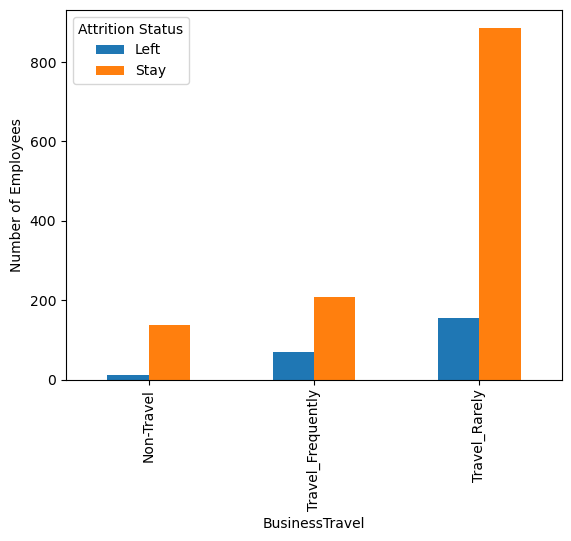

In [82]:
Travel_attrition.plot(kind='bar')
plt.ylabel('Number of Employees')

plt.show()

In [83]:
c, p, dof, expected = stats.chi2_contingency(Travel_attrition)
p

5.608614476449931e-06

H-null - There is no relationship between business travel  and attrition status

H-alternative - There is a relationship between business travel and attrition status

p-value > 0.05. alternative hypothesis is accepted.

There is a relationship between business travel and attrition status

The employee who travel frequently is more likely to leave the company

### Is there any difference in employee attrition based on department?

In [84]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'Job Satisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'Environment Satisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition Status'],
      dtype='object')

In [85]:
Department_attritionprop = pd.crosstab(index=df['Department'],columns=df['Attrition Status'], normalize='index')*100
Department_attritionprop

Attrition Status,Left,Stay
Department,,
Human Resources,19.047619,80.952381
Research & Development,13.839750,86.160250
Sales,20.627803,79.372197


In [87]:
Department_attrition = pd.crosstab(index=df['Department'],columns=df['Attrition Status'])
Department_attrition

Attrition Status,Left,Stay
Department,,
Human Resources,12,51
Research & Development,133,828
Sales,92,354


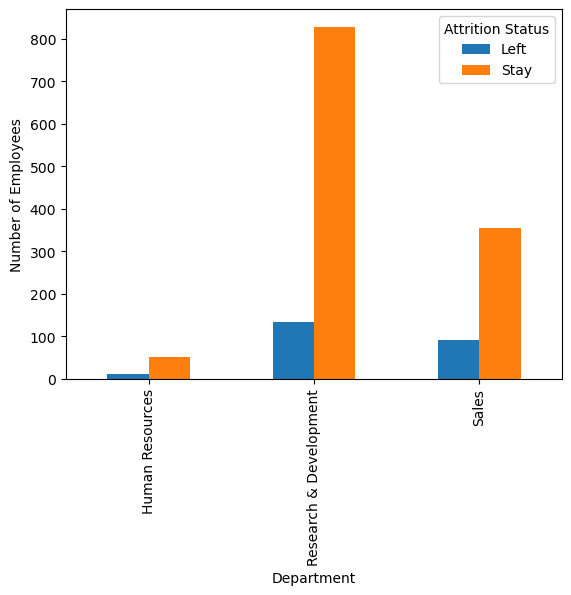

In [88]:
Dept_attrition.plot(kind='bar')
plt.ylabel('Number of Employees')

plt.show()

In [89]:
c, p, dof, expected = stats.chi2_contingency(Department_attrition)
p

0.004525606574479633

H-null - There is no relationship between department and attrition status

H-alternative - There is a relationship between department and attrition status

p-value > 0.05. alternative hypothesis is accepted.

There is a relationship between department and attrition status

The employee who work for research and department is more likely to leave the company

### Is the attrition status of an employee influenced by distance from home?

In [91]:
meanDistance_attrition = df.groupby('Attrition Status',as_index = False)['DistanceFromHome'].mean()
meanDistance_attrition = meanDistance_attrition.round(2)
meanDistance_attrition

,Attrition Status,DistanceFromHome
0,Left,10.63
1,Stay,8.92


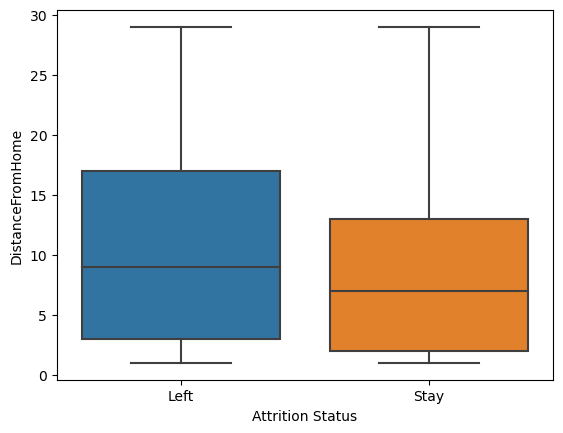

In [92]:
sns.boxplot(x='Attrition Status',
            y='DistanceFromHome',
           data=df)

plt.show()

In [93]:
stats.levene(df['DistanceFromHome'][df['Attrition Status']=='Left'],
             df['DistanceFromHome'][df['Attrition Status']=='Stay'],
             center='mean')

LeveneResult(statistic=4.974146689763782, pvalue=0.025879557896104303)

In [94]:
stats.ttest_ind(df['DistanceFromHome'][df['Attrition Status']=='Left'],
                df['DistanceFromHome'][df['Attrition Status']=='Stay'],
                equal_var=False)

TtestResult(statistic=2.888183062817627, pvalue=0.004136511971511406, df=322.7242793667992)

The p-value of 0.0041 is below 0.05. Therefore, It conclude that there is evidence to reject the null hypothesis, suggesting that there is a statistically significant relationship between the distance from home to the office and employee attrition status. 

## Logistic Regression Model

In [95]:
#Feature Selection
df= df[['Age', 'MonthlyIncome','DistanceFromHome', 'Job Satisfaction','BusinessTravel', 
        'Environment Satisfaction', 'JobRole', 'MaritalStatus','YearsAtCompany',
        'Department','OverTime', 'Attrition Status']]
df.head()

,Age,MonthlyIncome,DistanceFromHome,Job Satisfaction,BusinessTravel,Environment Satisfaction,JobRole,MaritalStatus,YearsAtCompany,Department,OverTime,Attrition Status
0,41,5993,1,Very High,Travel_Rarely,Medium,Sales Executive,Single,6,Sales,Yes,Left
1,49,5130,8,Medium,Travel_Frequently,High,Research Scientist,Married,10,Research & Development,No,Stay
2,37,2090,2,High,Travel_Rarely,Very High,Laboratory Technician,Single,0,Research & Development,Yes,Left
3,33,2909,3,High,Travel_Frequently,Very High,Research Scientist,Married,8,Research & Development,Yes,Stay
4,27,3468,2,Medium,Travel_Rarely,Low,Laboratory Technician,Married,2,Research & Development,No,Stay


In [96]:
#Assign input and output
x = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [97]:
#Handling categorical variable (inputs only)
#Transform Categorical to Encoded Dummy Numeric Variable
x = pd.get_dummies(x,drop_first=True)

In [98]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify = y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() scaler.fit(x_train) x_train = scaler.transform(x_train

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [100]:
#####Train Logistic Regression Algorithm

#Import LogisticRegression() function
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression classifier
class_model = LogisticRegression(random_state=0)

#Train the Logistic Regression algorithm using train set
class_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

Train Naive Bayes Algorithm

Import Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB

Create a Gaussian Classifier

class_model = GaussianNB()

Train the model using the training sets

class_model.fit(x_train,y_train)

In [101]:
#Scaling test set
x_test = scaler.transform(x_test)

In [102]:
#Apply model
y_pred=class_model.predict(x_test)

In [103]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.tail()

,Actual,Predicted
1050,Stay,Stay
931,Stay,Stay
296,Left,Stay
991,Stay,Stay
1027,Stay,Stay


In [104]:
pd.crosstab(y_pred,y_test)

Attrition Status,Left,Stay
row_0,,
Left,15,4
Stay,32,243


In [106]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

        Left       0.79      0.32      0.45        47
        Stay       0.88      0.98      0.93       247

    accuracy                           0.88       294
   macro avg       0.84      0.65      0.69       294
weighted avg       0.87      0.88      0.85       294



In [107]:
#Save the Model
import pickle

filename = 'class_model.sav' #Assigning name to the model

#Write it to the file
pickle.dump(class_model, open(filename,'wb')) #wb - write binary

In [108]:
#Save the Scaler Parameter
import joblib
joblib.dump(scaler,'scaler_class.save')

['scaler_class.save']